Importing Necessary Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
#Loading the dataset

data = pd.read_csv('Datasets/loan_student_version_final(Sheet1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Customer_ID,customer_loyalty_score,service_zone,customer_feedback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,202,D4,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2,535,A1,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3,960,A1,Excellent
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4,370,A1,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5,206,C3,NaN


In [58]:
data.shape

(632, 17)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632 entries, 0 to 631
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 632 non-null    object 
 1   Gender                  619 non-null    object 
 2   Married                 629 non-null    object 
 3   Dependents              598 non-null    object 
 4   Education               632 non-null    object 
 5   Self_Employed           599 non-null    object 
 6   ApplicantIncome         632 non-null    int64  
 7   CoapplicantIncome       632 non-null    float64
 8   LoanAmount              590 non-null    float64
 9   Loan_Amount_Term        618 non-null    float64
 10  Credit_History          565 non-null    float64
 11  Property_Area           632 non-null    object 
 12  Loan_Status             632 non-null    object 
 13  Customer_ID             632 non-null    int64  
 14  customer_loyalty_score  632 non-null    in

In [60]:
data.isnull().sum()

Loan_ID                     0
Gender                     13
Married                     3
Dependents                 34
Education                   0
Self_Employed              33
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 42
Loan_Amount_Term           14
Credit_History             67
Property_Area               0
Loan_Status                 0
Customer_ID                 0
customer_loyalty_score      0
service_zone                0
customer_feedback         506
dtype: int64

In [61]:
df = data
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Customer_ID,customer_loyalty_score,service_zone,customer_feedback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,202,D4,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2,535,A1,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3,960,A1,Excellent
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4,370,A1,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,5,206,C3,NaN


In [62]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
categorical_cols

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'service_zone',
 'customer_feedback']

In [63]:
numerical_cols = df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Customer_ID',
 'customer_loyalty_score']

In [66]:
df['Loan_Status'].value_counts()


Loan_Status
Y    411
N    193
1     26
0      2
Name: count, dtype: int64

In [67]:
df['Loan_Status']=df['Loan_Status'].str.replace('N','0')
df['Loan_Status'] = df['Loan_Status'].str.replace('Y','1')

In [68]:
df['Loan_Status'].value_counts()

Loan_Status
1    437
0    195
Name: count, dtype: int64

In [143]:
max_loan = df['Loan_Status'].value_counts().max()
min_loan = df['Loan_Status'].value_counts().min()

balanced_ratio = min_loan/max_loan

if balanced_ratio >0.5:
    print("Dataset is balanced")
else: 
    print("Dataset is imbalanced")

Dataset is imbalanced


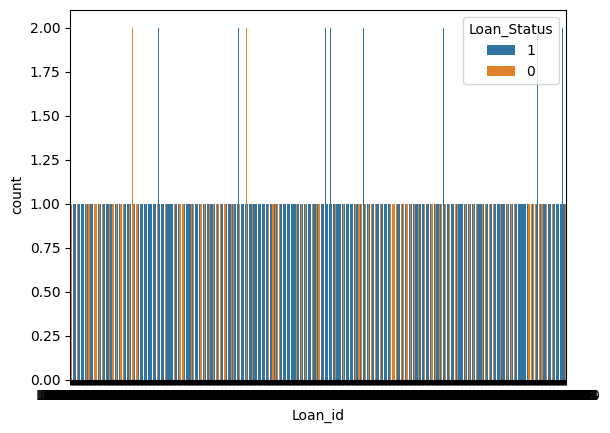

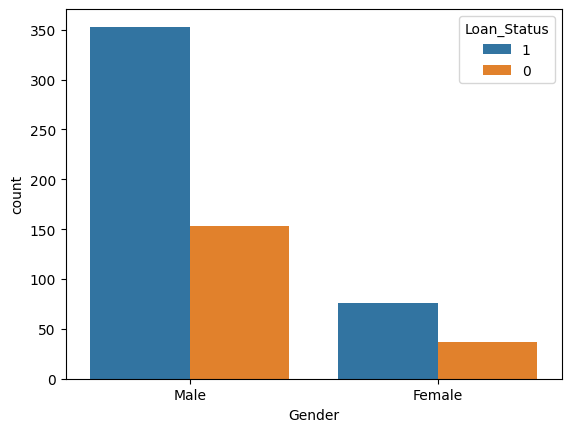

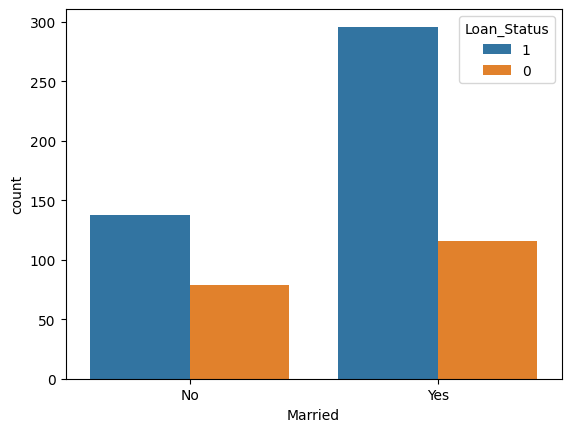

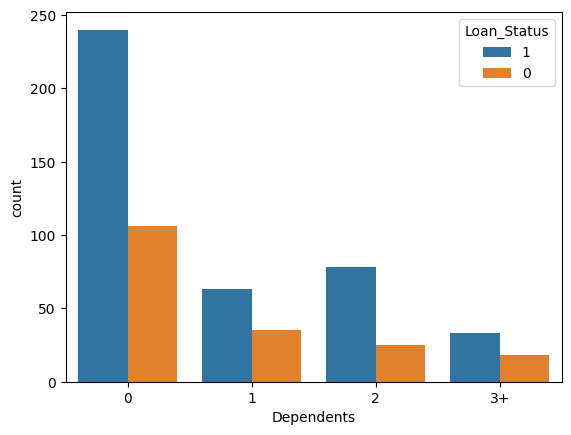

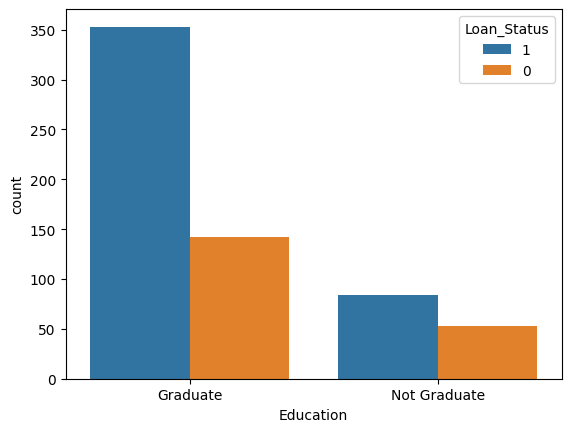

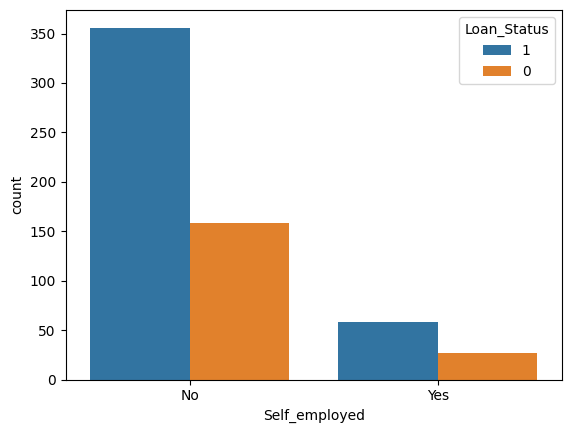

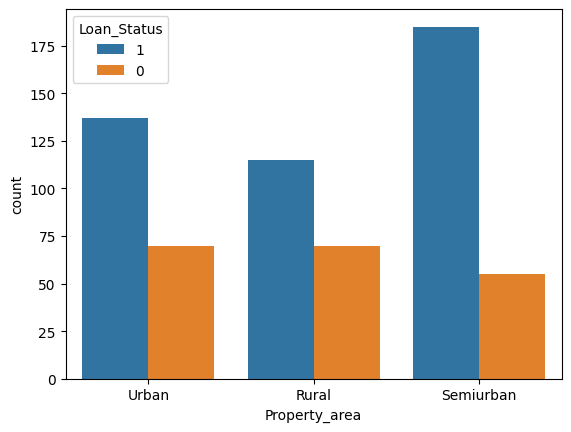

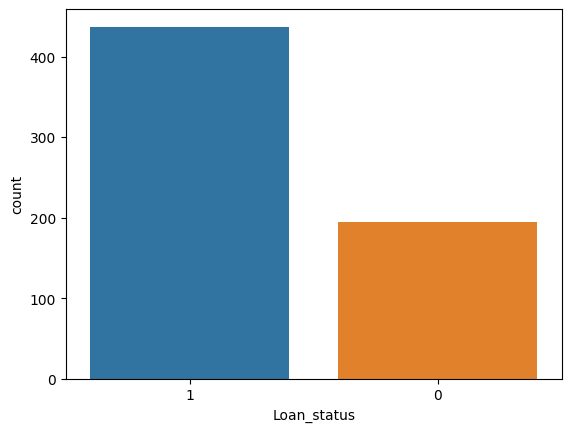

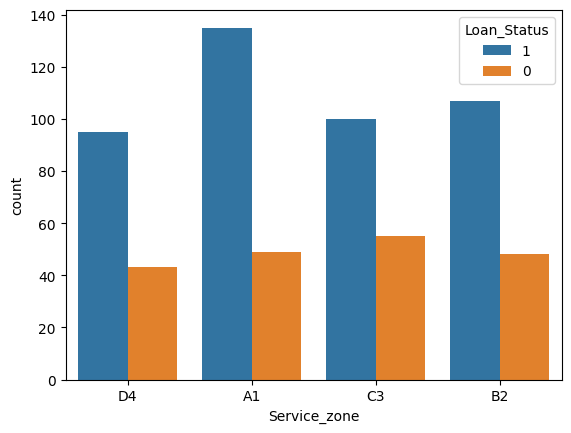

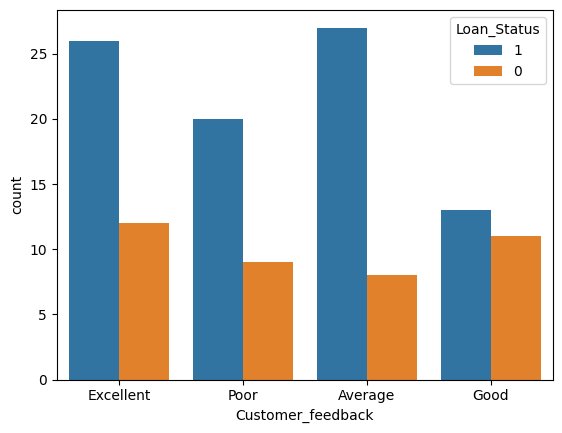

In [69]:
for col in categorical_cols:
    plt.figure()
    sns.countplot(data=df, x=col, hue='Loan_Status')
    plt.xlabel(col.capitalize())
    plt.show()

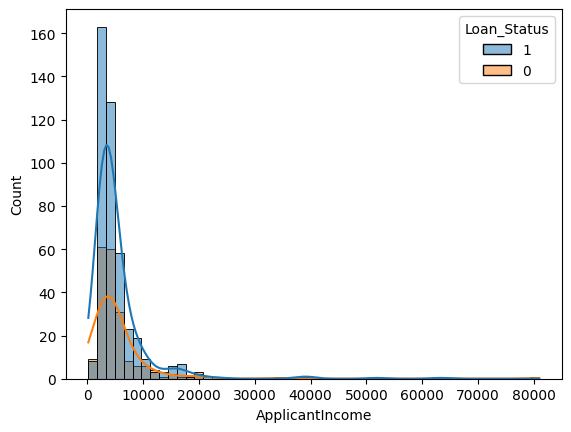

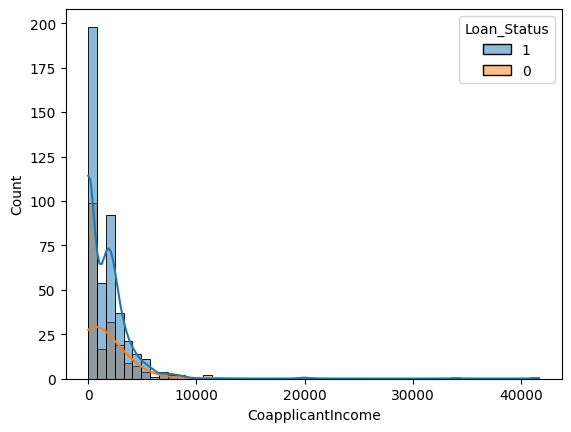

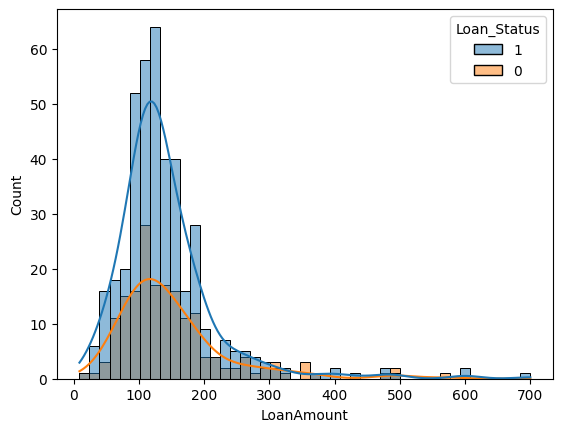

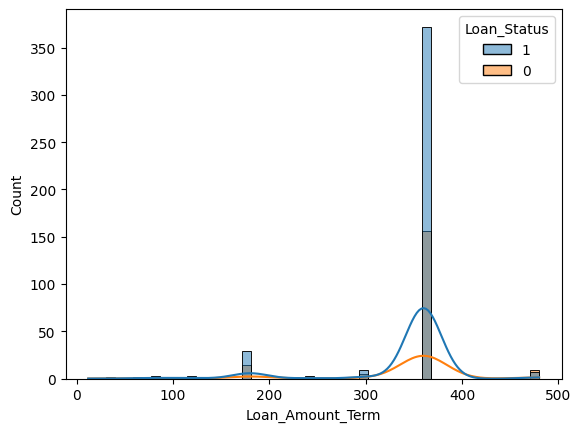

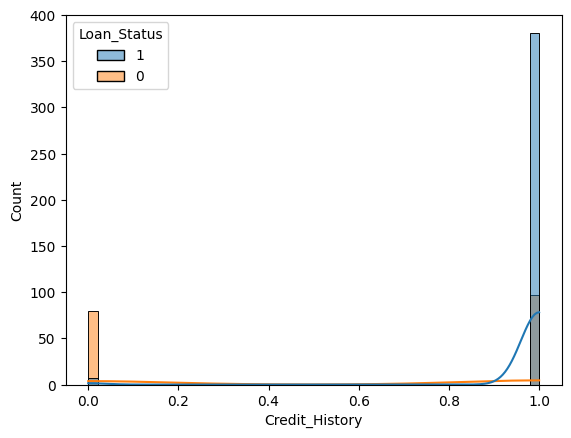

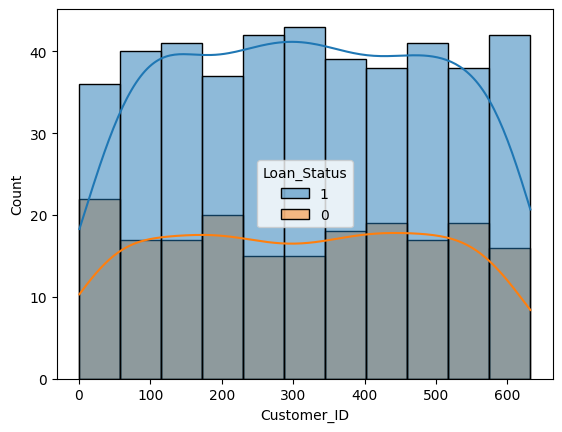

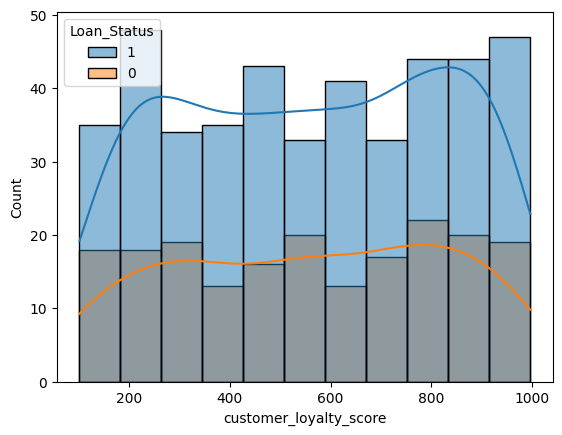

In [72]:
for col in numerical_cols:
    plt.figure()
    sns.histplot(x=col, data=df, hue='Loan_Status',kde=True)
    plt.show()

In [73]:
df =df.drop('Customer_ID', axis=1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone,customer_feedback
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,202,D4,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,535,A1,NaN
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,960,A1,Excellent
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,370,A1,NaN
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,206,C3,NaN


In [75]:
df = df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone,customer_feedback
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,202,D4,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,535,A1,NaN
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,960,A1,Excellent
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,370,A1,NaN
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,206,C3,NaN


In [76]:
categorical_cols= df.select_dtypes(include=object).columns.to_list()
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'service_zone',
 'customer_feedback']

In [77]:
numerical_cols= df.select_dtypes(include=np.number).columns.to_list()
numerical_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'customer_loyalty_score']

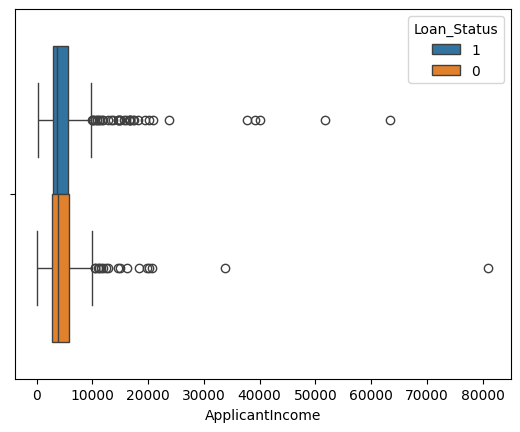

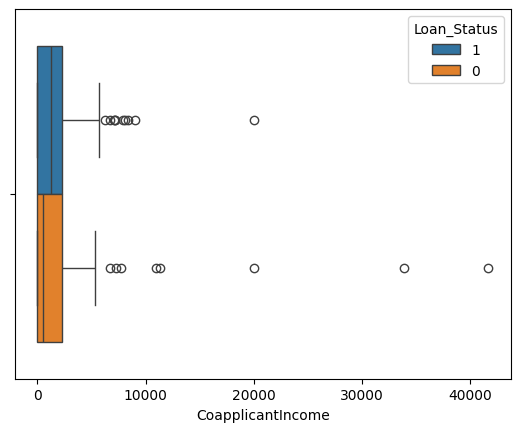

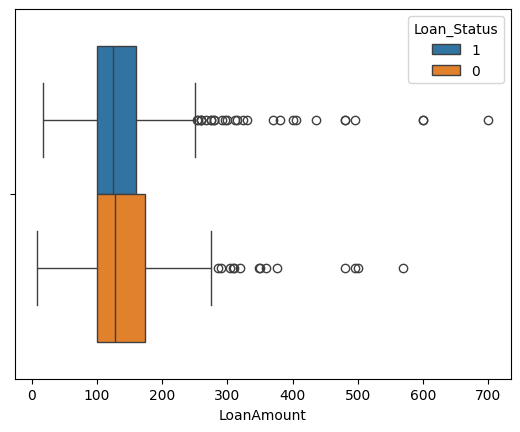

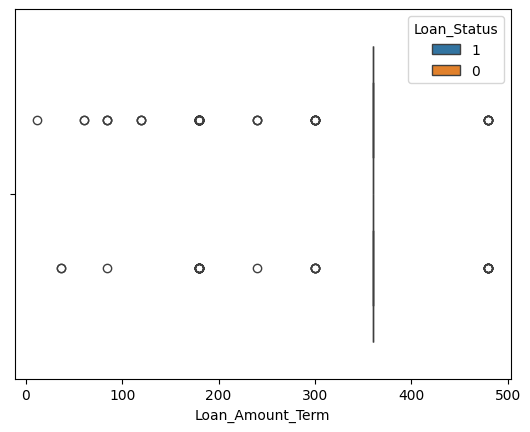

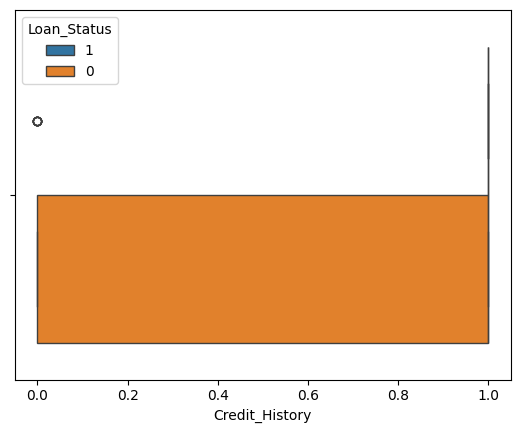

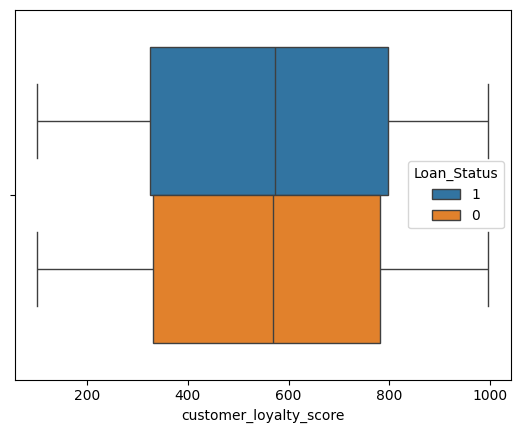

In [81]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(data=df,x=col, hue='Loan_Status')
    plt.show()

In [82]:
df.isnull().sum()

Gender                     13
Married                     3
Dependents                 34
Education                   0
Self_Employed              33
ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 42
Loan_Amount_Term           14
Credit_History             67
Property_Area               0
Loan_Status                 0
customer_loyalty_score      0
service_zone                0
customer_feedback         506
dtype: int64

In [83]:
df = df.drop('customer_feedback', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,202,D4
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,535,A1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,960,A1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,370,A1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,206,C3


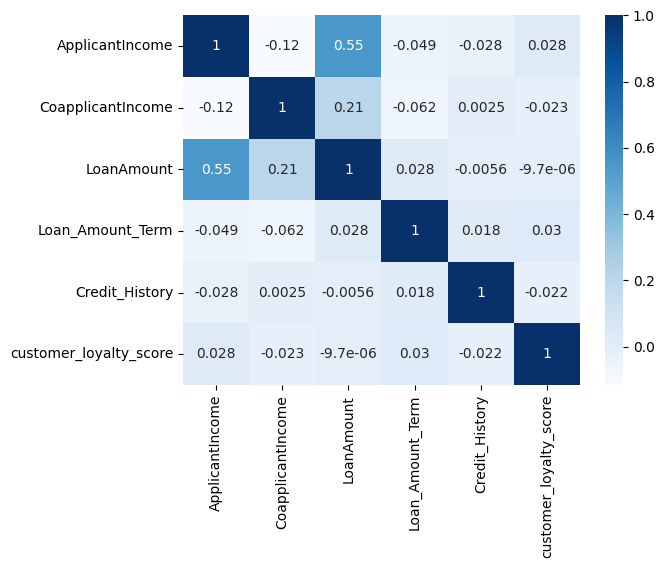

In [85]:
num_corr = df[numerical_cols].corr()
sns.heatmap(num_corr, annot=True, cmap='Blues')
plt.show()


In [87]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'service_zone']

In [88]:
for col in categorical_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

df.isnull().sum()

Gender                     0
Married                    0
Dependents                 0
Education                  0
Self_Employed              0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                42
Loan_Amount_Term          14
Credit_History            67
Property_Area              0
Loan_Status                0
customer_loyalty_score     0
service_zone               0
dtype: int64

In [89]:
for col in numerical_cols:
    df[col]=df[col].fillna(df[col].median())

df.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
customer_loyalty_score    0
service_zone              0
dtype: int64

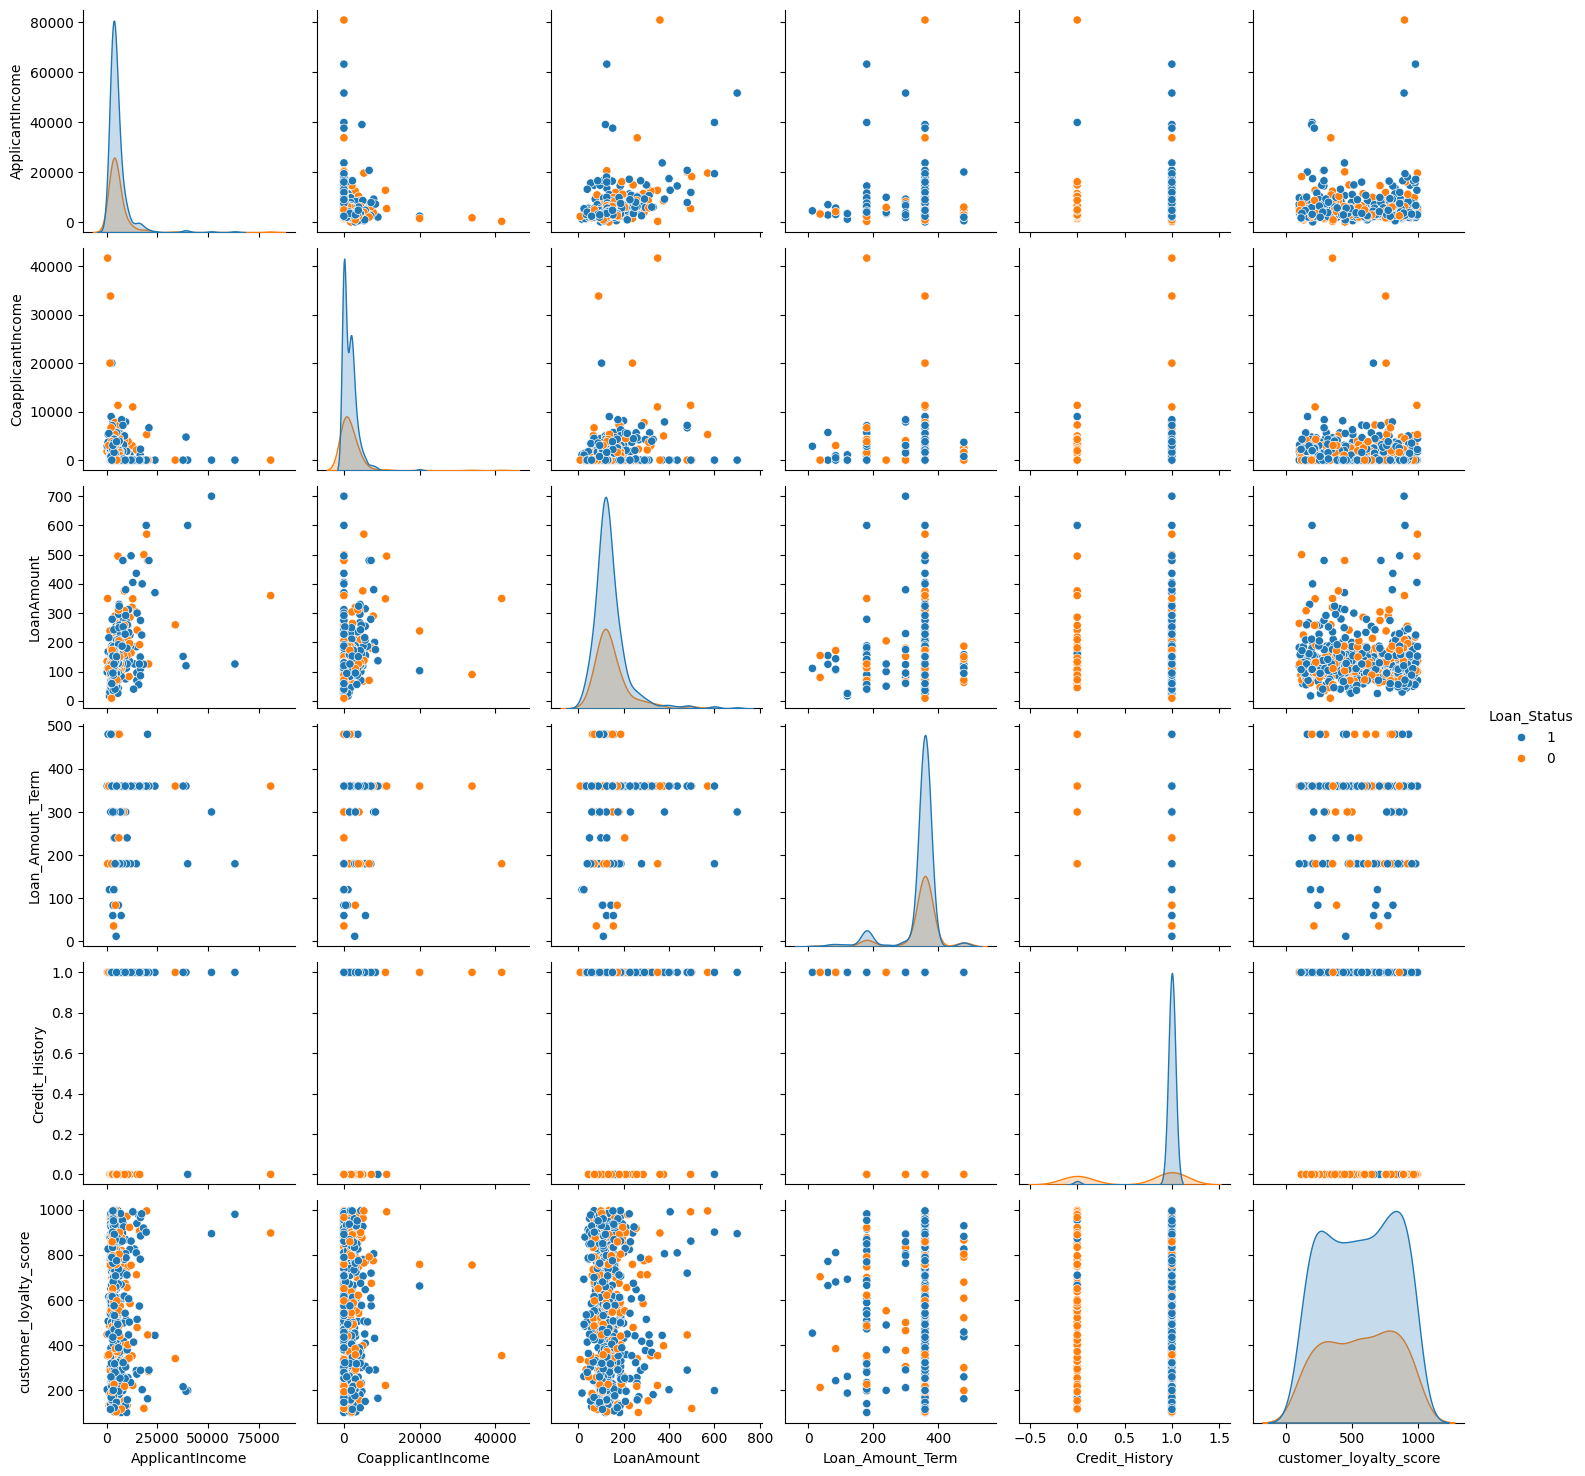

In [ ]:
sns.pairplot(df, vars=numerical_cols, hue='Loan_Status')
    

In [96]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,1,202,D4
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,535,A1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,960,A1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,370,A1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,206,C3


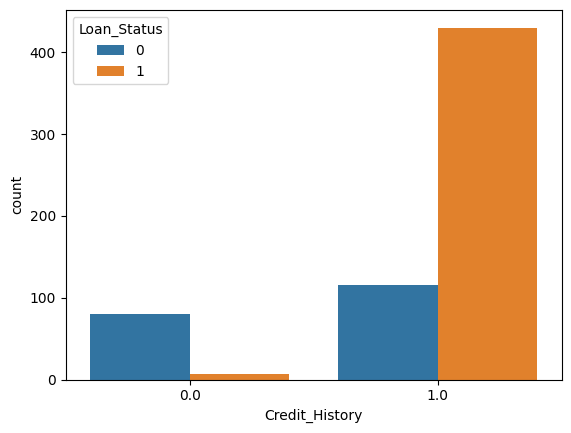

In [102]:
sns.countplot(x=df['Credit_History'],hue = df['Loan_Status'])
plt.show()

Performing Scaling


In [103]:
from sklearn.preprocessing  import StandardScaler

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,customer_loyalty_score,service_zone
0,Male,No,0,Graduate,No,0.082943,-0.557409,-0.212376,0.266486,0.399541,Urban,1,-1.358635,D4
1,Male,Yes,1,Graduate,No,-0.126948,-0.035870,-0.187085,0.266486,0.399541,Rural,0,-0.101831,A1
2,Male,Yes,0,Graduate,Yes,-0.389394,-0.557409,-0.971119,0.266486,0.399541,Urban,1,1.502198,A1
3,Male,Yes,0,Not Graduate,No,-0.458529,0.258102,-0.288250,0.266486,0.399541,Urban,1,-0.724572,A1
4,Male,No,0,Graduate,No,0.107977,-0.557409,-0.022690,0.266486,0.399541,Urban,1,-1.343538,C3


In [105]:
categorical_cols.remove('Loan_Status')
categorical_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'service_zone']

In [109]:
#One Hot Encoding for the categorical variables
df_encoded = pd.get_dummies(df, columns= categorical_cols, drop_first=True)
df_encoded.shape

(632, 19)

In [114]:
df_encoded['Loan_Status'].astype(int)
df_encoded['Loan_Status'].dtype

dtype('O')

In [115]:
df_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,customer_loyalty_score,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,service_zone_B2,service_zone_C3,service_zone_D4
0,0.082943,-0.557409,-0.212376,0.266486,0.399541,1,-1.358635,True,False,False,False,False,False,False,False,True,False,False,True
1,-0.126948,-0.035870,-0.187085,0.266486,0.399541,0,-0.101831,True,True,True,False,False,False,False,False,False,False,False,False
2,-0.389394,-0.557409,-0.971119,0.266486,0.399541,1,1.502198,True,True,False,False,False,False,True,False,True,False,False,False
3,-0.458529,0.258102,-0.288250,0.266486,0.399541,1,-0.724572,True,True,False,False,False,True,False,False,True,False,False,False
4,0.107977,-0.557409,-0.022690,0.266486,0.399541,1,-1.343538,True,False,False,False,False,False,False,False,True,False,True,False


In [121]:
#Performing Train Test Split
X = df_encoded.drop('Loan_Status', axis=1)
X.shape
y = df_encoded['Loan_Status']
y=y.astype(int)
y.dtype


dtype('int64')

In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

The accuracy Score is: 
0.7795275590551181


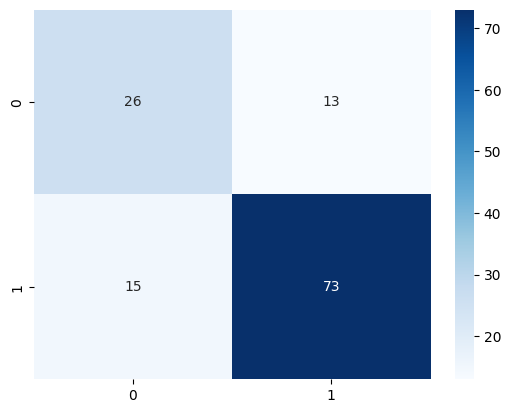

              precision    recall  f1-score   support

           0       0.63      0.67      0.65        39
           1       0.85      0.83      0.84        88

    accuracy                           0.78       127
   macro avg       0.74      0.75      0.74       127
weighted avg       0.78      0.78      0.78       127



In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

print("The accuracy Score is: ")
print(accuracy_score(y_test,y_pred))

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d',cmap='Blues')
plt.show()

print(classification_report(y_test, y_pred))

Accuracy score is: 
0.7086614173228346
              precision    recall  f1-score   support

           0       0.53      0.51      0.52        39
           1       0.79      0.80      0.79        88

    accuracy                           0.71       127
   macro avg       0.66      0.65      0.66       127
weighted avg       0.71      0.71      0.71       127



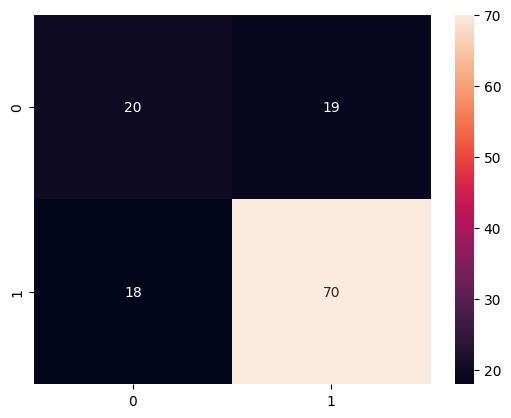

In [145]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train,y_train)

dt_y_pred = dt.predict(X_test)

print("Accuracy score is: ")
print(accuracy_score(y_test,dt_y_pred))

sns.heatmap(confusion_matrix(y_test,dt_y_pred), annot=True)

print(classification_report(y_test, dt_y_pred))



0.8188976377952756
classification_report is : 
              precision    recall  f1-score   support

           0       0.86      0.49      0.62        39
           1       0.81      0.97      0.88        88

    accuracy                           0.82       127
   macro avg       0.84      0.73      0.75       127
weighted avg       0.83      0.82      0.80       127



<Axes: >

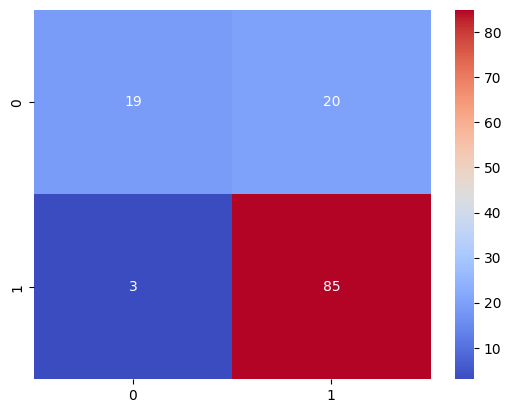

In [146]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)
print(accuracy_score(y_test, rf_y_pred))

print("classification_report is : ")
print(classification_report(y_test, rf_y_pred))

sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='coolwarm')

In [147]:
xg = XGBClassifier(class_weight='balanced')
xg.fit(X_train,y_train)

xg_y_pred = xg.predict(X_test)
print(accuracy_score(y_test, xg_y_pred))

print(classification_report(y_test, xg_y_pred))

0.7716535433070866
              precision    recall  f1-score   support

           0       0.67      0.51      0.58        39
           1       0.80      0.89      0.84        88

    accuracy                           0.77       127
   macro avg       0.74      0.70      0.71       127
weighted avg       0.76      0.77      0.76       127

